# Importing necessary libraries

In [24]:
from docx import Document
import string
import re
import nltk
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import numpy as np
import matplotlib.image as mpimg
import matplotlib.colors as colors
import colorsys

# Reading the file
Problems_of_poverty.docx - The document is a Word file that focuses on the factors contributing to poverty, with a primary emphasis on the issue of insufficient job opportunities and high unemployment rates.

In [50]:
# reading the file and file contents
doc = Document('Problems_of_poverty.docx')
doc

In [26]:
text_problems = "" # creation of an empty string to store the content of the doc

# converting the content of the doc into a string
for paragraph in doc.paragraphs:
    text_problems = text_problems + paragraph.text + "\n"

In [27]:
text_problems # displaying the file contents

"Poverty in the world\nA person is experiencing poverty when they are deprived of basic human needs such as food, clothing, shelter, safe drinking water, healthcare and sanitation, and minimal educational opportunities.Worldwide statistics show that people born into poverty are likely to remain poor especially when the economic system of the country works against them with no access to healthy food, decent housing, and proper sanitation facilities.\xa0This is called the cycle of poverty.\xa0Therefore, the concept of poverty, whether absolute or relative, isn’t simple. It doesn't only involve economics but it is also a social and political problem in nature.\nThe problems of poverty-\nThe persistent issue of poverty is driven by a multitude of complex factors, two of which are the lack of good jobs/job growth and unemployment. In a global landscape where stable and well-paying employment opportunities are increasingly scarce, poverty remains a prevalent challenge. Traditional livelihood

# Converting into Lower Case

In [28]:
# Transforming the string into lowercase using lower() function
text_problems = text_problems.lower()
text_problems

"poverty in the world\na person is experiencing poverty when they are deprived of basic human needs such as food, clothing, shelter, safe drinking water, healthcare and sanitation, and minimal educational opportunities.worldwide statistics show that people born into poverty are likely to remain poor especially when the economic system of the country works against them with no access to healthy food, decent housing, and proper sanitation facilities.\xa0this is called the cycle of poverty.\xa0therefore, the concept of poverty, whether absolute or relative, isn’t simple. it doesn't only involve economics but it is also a social and political problem in nature.\nthe problems of poverty-\nthe persistent issue of poverty is driven by a multitude of complex factors, two of which are the lack of good jobs/job growth and unemployment. in a global landscape where stable and well-paying employment opportunities are increasingly scarce, poverty remains a prevalent challenge. traditional livelihood

# Removing Punctuations

In [29]:
# Remove all punctuation characters from the text
text_problems = text_problems.translate(str.maketrans('', '', string.punctuation))
text_problems

'poverty in the world\na person is experiencing poverty when they are deprived of basic human needs such as food clothing shelter safe drinking water healthcare and sanitation and minimal educational opportunitiesworldwide statistics show that people born into poverty are likely to remain poor especially when the economic system of the country works against them with no access to healthy food decent housing and proper sanitation facilities\xa0this is called the cycle of poverty\xa0therefore the concept of poverty whether absolute or relative isn’t simple it doesnt only involve economics but it is also a social and political problem in nature\nthe problems of poverty\nthe persistent issue of poverty is driven by a multitude of complex factors two of which are the lack of good jobsjob growth and unemployment in a global landscape where stable and wellpaying employment opportunities are increasingly scarce poverty remains a prevalent challenge traditional livelihoods like farming are vani

# Removing unwanted characters using RE

In [30]:
# The pattern '[\n|\xa0]' matches either a newline or a non-breaking space character
res1 = re.findall(r'[\n|\xa0]', text_problems) 
res1

['\n',
 '\xa0',
 '\xa0',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n']

In [31]:
# Matched patterns are replaced by a single whitespace character
text_problems = re.sub(r'[\n|\xa0]', ' ',text_problems)
text_problems

'poverty in the world a person is experiencing poverty when they are deprived of basic human needs such as food clothing shelter safe drinking water healthcare and sanitation and minimal educational opportunitiesworldwide statistics show that people born into poverty are likely to remain poor especially when the economic system of the country works against them with no access to healthy food decent housing and proper sanitation facilities this is called the cycle of poverty therefore the concept of poverty whether absolute or relative isn’t simple it doesnt only involve economics but it is also a social and political problem in nature the problems of poverty the persistent issue of poverty is driven by a multitude of complex factors two of which are the lack of good jobsjob growth and unemployment in a global landscape where stable and wellpaying employment opportunities are increasingly scarce poverty remains a prevalent challenge traditional livelihoods like farming are vanishing in 

In [32]:
# Matches one or more consecutive digits
res2 = re.findall(r'\d+', text_problems) 
res2

['19', '20']

In [33]:
# Matched patterns are replaced by a single whitespace character
text_problems = re.sub(r'\d+', ' ',text_problems)
text_problems

'poverty in the world a person is experiencing poverty when they are deprived of basic human needs such as food clothing shelter safe drinking water healthcare and sanitation and minimal educational opportunitiesworldwide statistics show that people born into poverty are likely to remain poor especially when the economic system of the country works against them with no access to healthy food decent housing and proper sanitation facilities this is called the cycle of poverty therefore the concept of poverty whether absolute or relative isn’t simple it doesnt only involve economics but it is also a social and political problem in nature the problems of poverty the persistent issue of poverty is driven by a multitude of complex factors two of which are the lack of good jobsjob growth and unemployment in a global landscape where stable and wellpaying employment opportunities are increasingly scarce poverty remains a prevalent challenge traditional livelihoods like farming are vanishing in 

In [34]:
# Matches two or more consecutive whitespace characters
res3 = re.findall(r'\s{2,}', text_problems) 
res3

['  ', '  ']

In [35]:
# Matched patterns are replaced by a single whitespace character
text_problems = re.sub(r'\s{2,}', ' ',text_problems)
text_problems

'poverty in the world a person is experiencing poverty when they are deprived of basic human needs such as food clothing shelter safe drinking water healthcare and sanitation and minimal educational opportunitiesworldwide statistics show that people born into poverty are likely to remain poor especially when the economic system of the country works against them with no access to healthy food decent housing and proper sanitation facilities this is called the cycle of poverty therefore the concept of poverty whether absolute or relative isn’t simple it doesnt only involve economics but it is also a social and political problem in nature the problems of poverty the persistent issue of poverty is driven by a multitude of complex factors two of which are the lack of good jobsjob growth and unemployment in a global landscape where stable and wellpaying employment opportunities are increasingly scarce poverty remains a prevalent challenge traditional livelihoods like farming are vanishing in 

# Word Tokenization

In [36]:
# 'word_tokenize()' function to tokenize the text into words
tokens_problem = word_tokenize(text_problems)
tokens_problem

['poverty',
 'in',
 'the',
 'world',
 'a',
 'person',
 'is',
 'experiencing',
 'poverty',
 'when',
 'they',
 'are',
 'deprived',
 'of',
 'basic',
 'human',
 'needs',
 'such',
 'as',
 'food',
 'clothing',
 'shelter',
 'safe',
 'drinking',
 'water',
 'healthcare',
 'and',
 'sanitation',
 'and',
 'minimal',
 'educational',
 'opportunitiesworldwide',
 'statistics',
 'show',
 'that',
 'people',
 'born',
 'into',
 'poverty',
 'are',
 'likely',
 'to',
 'remain',
 'poor',
 'especially',
 'when',
 'the',
 'economic',
 'system',
 'of',
 'the',
 'country',
 'works',
 'against',
 'them',
 'with',
 'no',
 'access',
 'to',
 'healthy',
 'food',
 'decent',
 'housing',
 'and',
 'proper',
 'sanitation',
 'facilities',
 'this',
 'is',
 'called',
 'the',
 'cycle',
 'of',
 'poverty',
 'therefore',
 'the',
 'concept',
 'of',
 'poverty',
 'whether',
 'absolute',
 'or',
 'relative',
 'isn',
 '’',
 't',
 'simple',
 'it',
 'doesnt',
 'only',
 'involve',
 'economics',
 'but',
 'it',
 'is',
 'also',
 'a',
 'socia

# Removing stopwords

In [37]:
list_of_stopwords = stopwords.words('English') # storing the stopwords in a list
list_of_stopwords 

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
# Filters out stopwords from the 'tokens_problem' list
tokens_problem = [word for word in tokens_problem if word not in list_of_stopwords]
tokens_problem

['poverty',
 'world',
 'person',
 'experiencing',
 'poverty',
 'deprived',
 'basic',
 'human',
 'needs',
 'food',
 'clothing',
 'shelter',
 'safe',
 'drinking',
 'water',
 'healthcare',
 'sanitation',
 'minimal',
 'educational',
 'opportunitiesworldwide',
 'statistics',
 'show',
 'people',
 'born',
 'poverty',
 'likely',
 'remain',
 'poor',
 'especially',
 'economic',
 'system',
 'country',
 'works',
 'access',
 'healthy',
 'food',
 'decent',
 'housing',
 'proper',
 'sanitation',
 'facilities',
 'called',
 'cycle',
 'poverty',
 'therefore',
 'concept',
 'poverty',
 'whether',
 'absolute',
 'relative',
 '’',
 'simple',
 'doesnt',
 'involve',
 'economics',
 'also',
 'social',
 'political',
 'problem',
 'nature',
 'problems',
 'poverty',
 'persistent',
 'issue',
 'poverty',
 'driven',
 'multitude',
 'complex',
 'factors',
 'two',
 'lack',
 'good',
 'jobsjob',
 'growth',
 'unemployment',
 'global',
 'landscape',
 'stable',
 'wellpaying',
 'employment',
 'opportunities',
 'increasingly',
 '

# Lemmatization

In [39]:
# Creating an instance of the WordNetLemmatizer
lemma = nltk.WordNetLemmatizer()

# lemmatizes each word in the 'tokens_problem' list
lemma_tokens_problem = [lemma.lemmatize(i) for i in tokens_problem]
lemma_tokens_problem

['poverty',
 'world',
 'person',
 'experiencing',
 'poverty',
 'deprived',
 'basic',
 'human',
 'need',
 'food',
 'clothing',
 'shelter',
 'safe',
 'drinking',
 'water',
 'healthcare',
 'sanitation',
 'minimal',
 'educational',
 'opportunitiesworldwide',
 'statistic',
 'show',
 'people',
 'born',
 'poverty',
 'likely',
 'remain',
 'poor',
 'especially',
 'economic',
 'system',
 'country',
 'work',
 'access',
 'healthy',
 'food',
 'decent',
 'housing',
 'proper',
 'sanitation',
 'facility',
 'called',
 'cycle',
 'poverty',
 'therefore',
 'concept',
 'poverty',
 'whether',
 'absolute',
 'relative',
 '’',
 'simple',
 'doesnt',
 'involve',
 'economics',
 'also',
 'social',
 'political',
 'problem',
 'nature',
 'problem',
 'poverty',
 'persistent',
 'issue',
 'poverty',
 'driven',
 'multitude',
 'complex',
 'factor',
 'two',
 'lack',
 'good',
 'jobsjob',
 'growth',
 'unemployment',
 'global',
 'landscape',
 'stable',
 'wellpaying',
 'employment',
 'opportunity',
 'increasingly',
 'scarce',


In [40]:
# Comparing the actual token with the lemmatized token
for i in range (len(tokens_problem)):
    print(tokens_problem[i] + " --------> "+ lemma_tokens_problem[i])

poverty --------> poverty
world --------> world
person --------> person
experiencing --------> experiencing
poverty --------> poverty
deprived --------> deprived
basic --------> basic
human --------> human
needs --------> need
food --------> food
clothing --------> clothing
shelter --------> shelter
safe --------> safe
drinking --------> drinking
water --------> water
healthcare --------> healthcare
sanitation --------> sanitation
minimal --------> minimal
educational --------> educational
opportunitiesworldwide --------> opportunitiesworldwide
statistics --------> statistic
show --------> show
people --------> people
born --------> born
poverty --------> poverty
likely --------> likely
remain --------> remain
poor --------> poor
especially --------> especially
economic --------> economic
system --------> system
country --------> country
works --------> work
access --------> access
healthy --------> healthy
food --------> food
decent --------> decent
housing --------> housing
proper --

# Customizing stopwords

In [41]:
# List of customized stopwords
customized_stopwords = ['absolute','absence','across','added', 'additionally', 'address', 'addressing','among','becomes','born','break',
                        'breaking', 'called','causes','causing','child','citizen','city','complex','compound','compounding','concept',
                        'congo','consequently','cover','create','creates','creating','creation','critical','crucial','decent','deepens',
                        'deeply','despite','doesnt','driven','driver','due','either','end','even','find','form','furthermore','half',
                        'including','involve','jobsjob','key','lasting','like','likely','make','making','many','may','meet','moreover',
                        'net','number','numerous','observed','often','overall','overwhelm','part','particularly','rather','relies',
                        'remain','remains','requires','several','still','take','th','therefore','thus','two','ultimately','whether',
                        'within','without','’']

In [42]:
# Filters out customized stopwords from the 'lemma_tokens_problem' list
tokens_problem = [word for word in lemma_tokens_problem if word not in customized_stopwords]
tokens_problem

['poverty',
 'world',
 'person',
 'experiencing',
 'poverty',
 'deprived',
 'basic',
 'human',
 'need',
 'food',
 'clothing',
 'shelter',
 'safe',
 'drinking',
 'water',
 'healthcare',
 'sanitation',
 'minimal',
 'educational',
 'opportunitiesworldwide',
 'statistic',
 'show',
 'people',
 'poverty',
 'poor',
 'especially',
 'economic',
 'system',
 'country',
 'work',
 'access',
 'healthy',
 'food',
 'housing',
 'proper',
 'sanitation',
 'facility',
 'cycle',
 'poverty',
 'poverty',
 'relative',
 'simple',
 'economics',
 'also',
 'social',
 'political',
 'problem',
 'nature',
 'problem',
 'poverty',
 'persistent',
 'issue',
 'poverty',
 'multitude',
 'factor',
 'lack',
 'good',
 'growth',
 'unemployment',
 'global',
 'landscape',
 'stable',
 'wellpaying',
 'employment',
 'opportunity',
 'increasingly',
 'scarce',
 'poverty',
 'prevalent',
 'challenge',
 'traditional',
 'livelihood',
 'farming',
 'vanishing',
 'nation',
 'exemplified',
 'democratic',
 'republic',
 'rural',
 'community',


# Frequency count of each token

In [43]:
# count the frequency of each word in the 'tokens_problem' list
word_counts = Counter(tokens_problem)

# Sorts the tokens in the descending order of frequency
word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))
word_counts

{'poverty': 48,
 'job': 29,
 'policy': 23,
 'government': 22,
 'economic': 18,
 'employment': 14,
 'unemployment': 13,
 'opportunity': 13,
 'education': 13,
 'cycle': 12,
 'individual': 11,
 'access': 10,
 'financial': 10,
 'development': 9,
 'healthcare': 8,
 'social': 8,
 'lack': 8,
 'growth': 8,
 'inequality': 8,
 'issue': 7,
 'workforce': 7,
 'wellbeing': 7,
 'ineffective': 7,
 'also': 6,
 'nation': 6,
 'leaving': 6,
 'significant': 6,
 'skill': 6,
 'family': 6,
 'basic': 5,
 'factor': 5,
 'good': 5,
 'income': 5,
 'leading': 5,
 'quality': 5,
 'contribute': 5,
 'lowincome': 5,
 'inadequate': 5,
 'limited': 5,
 'perpetuate': 5,
 'effective': 5,
 'food': 4,
 'resource': 4,
 'population': 4,
 'exacerbating': 4,
 'structural': 4,
 'stability': 4,
 'future': 4,
 'safety': 4,
 'society': 4,
 'wage': 4,
 'lead': 4,
 'business': 4,
 'high': 4,
 'difficult': 4,
 'result': 4,
 'hardship': 4,
 'role': 4,
 'governmentsupported': 4,
 'need': 3,
 'water': 3,
 'problem': 3,
 'landscape': 3,
 'we

In [44]:
# Joining the list of cleaned tokens back into a single string
clean_text_problem = ' '.join(tokens_problem)
clean_text_problem

'poverty world person experiencing poverty deprived basic human need food clothing shelter safe drinking water healthcare sanitation minimal educational opportunitiesworldwide statistic show people poverty poor especially economic system country work access healthy food housing proper sanitation facility cycle poverty poverty relative simple economics also social political problem nature problem poverty persistent issue poverty multitude factor lack good growth unemployment global landscape stable wellpaying employment opportunity increasingly scarce poverty prevalent challenge traditional livelihood farming vanishing nation exemplified democratic republic rural community stripped natural resource year colonial exploitation leaving population poverty line developed nation united state significant portion workforce holding fulltime yearround position grapple income falling federal poverty guideline reflecting stark inadequacy available job rise temporary parttime employment exacerbated 

# WORDCLOUD

# Code snippet to change color of wordcloud

- color = 'xkcd:color_name': This line defines a variable color and assigns it the value 'xkcd:color_name'. This value represents a specific color named "color_name" from the xkcd color survey. The format 'xkcd:color_name' is used to specify colors from the xkcd color survey.
- r, g, b = colors.to_rgb(color): Here, the code uses the colors.to_rgb() function to convert the color string color into its RGB (Red, Green, Blue) components. The resulting RGB values are assigned to the variables r, g, and b.
- h, l, s = colorsys.rgb_to_hls(r, g, b): This line uses the colorsys.rgb_to_hls() function to convert the RGB values (r, g, b) into HSL (Hue, Saturation, Lightness) components. The resulting HSL values are assigned to the variables h, l, and s.
- hsl_val = 'hsl(' + str(h*360) + ', 100%%, %d%%)': Here, a string hsl_val is constructed in the format 'hsl(hue, 100%, %d%)', where hue is calculated from the h value (multiplied by 360 to convert it to degrees), and the other values (100% for saturation and variable %d% for lightness) are left as placeholders for later formatting.

In [45]:
color = 'xkcd:fire engine red'           
r,g,b = colors.to_rgb(color)        
h,l,s = colorsys.rgb_to_hls(r,g,b)
hsl_val = 'hsl(' + str(h*360) + ', 100%%, %d%%)'
def hsl_color_func(word, font_size, position, orientation, random_state = None, **kwargs):
    return(hsl_val % np.random.randint(0,100))

# Creating a wordcloud

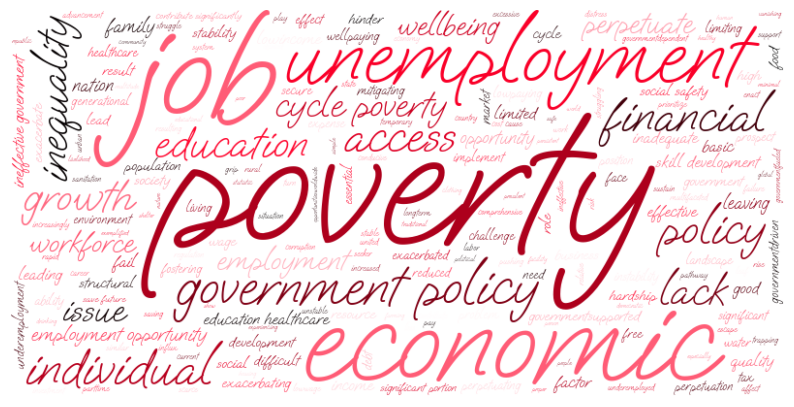

In [49]:
words = clean_text_problem.lower().split() # Splits the string into individual words
# Generating a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white',max_words = 200,font_path='OoohBaby-Regular.ttf').generate(clean_text_problem)
wordcloud.recolor(color_func = hsl_color_func) # applies a custom color function
plt.figure(figsize=(10,10)) # Creates a new figure for the plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show() # Displays the word cloud plot

# Masked Images

In [47]:
color = 'xkcd:cherry red'           
r,g,b = colors.to_rgb(color)        
h,l,s = colorsys.rgb_to_hls(r,g,b)
hsl_val = 'hsl(' + str(h*360) + ', 100%%, %d%%)'
def hsl_color_func(word, font_size, position, orientation, random_state = None, **kwargs):
    return(hsl_val % np.random.randint(0,100))

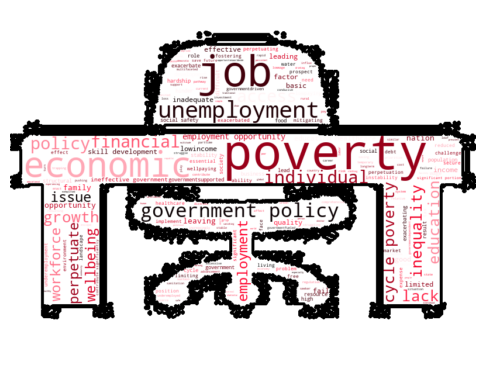

<Figure size 2000x2000 with 0 Axes>

In [52]:
no_poverty1 = np.array(Image.open("empty_desk.jpg")) # Loading the image to be masked
# Generating a WordCloud object
wc = WordCloud(background_color="white", mask = no_poverty1, contour_width=5, 
               contour_color='black',color_func = hsl_color_func).generate(clean_text_problem)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off") # Turn off axis labels
plt.figure(figsize=(20,20)) # Creates a new figure for the plot
plt.show() # Displays the word cloud plot